<a href="https://colab.research.google.com/github/supu18/cifar10-deep-learning-evaluation/blob/dev/CIFAR-10_deep_learning_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision

We'll create a small fully connected neural network with and without batch normalization to observe the effects on training.

**Explanation**

***Model Definition:*** `SimpleNN` has an option to include batch normalization after each linear layer. When `use_bn=True`, batch normalization layers `bn1` and `bn2` are active.

***Training:*** The train function runs the training loop for each model, recording the loss at each epoch.

***Comparison:*** After training, the code plots the losses for both models. Typically, you should see that the model with batch normalization converges faster and potentially achieves a lower loss compared to the model without batch normalization.

***Expected Outcome***
Batch normalization typically reduces training time and improves stability, so you should see a smoother and faster decline in the loss curve for the model with batch normalization.

Training model with batch normalization...
Epoch [1/5], Loss: 0.2450
Epoch [2/5], Loss: 0.1225
Epoch [3/5], Loss: 0.0975
Epoch [4/5], Loss: 0.0827
Epoch [5/5], Loss: 0.0678

Training model without batch normalization...
Epoch [1/5], Loss: 0.3452
Epoch [2/5], Loss: 0.1519
Epoch [3/5], Loss: 0.1144
Epoch [4/5], Loss: 0.0933
Epoch [5/5], Loss: 0.0799


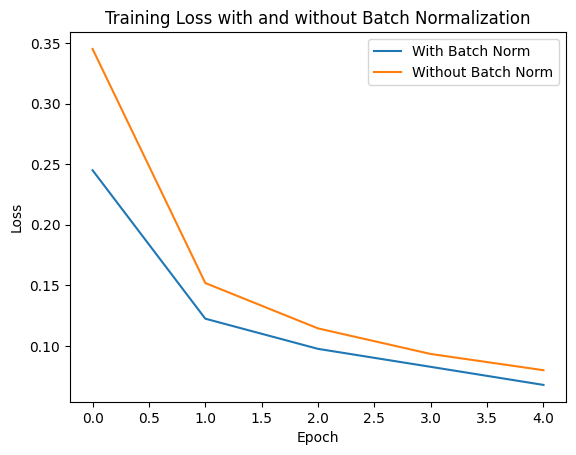

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# Define two models: one with batch normalization, one without

class SimpleNN(nn.Module):
    def __init__(self, use_bn=False):
        super(SimpleNN, self).__init__()
        self.use_bn = use_bn
        self.layer1 = nn.Linear(28*28, 256)
        self.bn1 = nn.BatchNorm1d(256) if use_bn else nn.Identity()
        self.layer2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128) if use_bn else nn.Identity()
        self.layer3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = self.bn1(torch.relu(self.layer1(x)))
        x = self.bn2(torch.relu(self.layer2(x)))
        x = self.layer3(x)
        return x

# Initialize models, loss, and optimizer
model_with_bn = SimpleNN(use_bn=True)
model_without_bn = SimpleNN(use_bn=False)
criterion = nn.CrossEntropyLoss()
optimizer_with_bn = optim.Adam(model_with_bn.parameters(), lr=0.001)
optimizer_without_bn = optim.Adam(model_without_bn.parameters(), lr=0.001)

# Training function
def train(model, optimizer, num_epochs=5):
    model.train()
    losses = []
    for epoch in range(num_epochs):
        epoch_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(train_loader)
        losses.append(avg_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return losses

# Train both models
print("Training model with batch normalization...")
losses_with_bn = train(model_with_bn, optimizer_with_bn)

print("\nTraining model without batch normalization...")
losses_without_bn = train(model_without_bn, optimizer_without_bn)

# Plotting the losses
plt.plot(losses_with_bn, label="With Batch Norm")
plt.plot(losses_without_bn, label="Without Batch Norm")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Training Loss with and without Batch Normalization")
plt.show()


Training model with batch normalization...
Epoch [1/5], Loss: 0.2074
Epoch [2/5], Loss: 0.0851
Epoch [3/5], Loss: 0.0590
Epoch [4/5], Loss: 0.0447
Epoch [5/5], Loss: 0.0370

Training model without batch normalization...
Epoch [1/5], Loss: 0.3439
Epoch [2/5], Loss: 0.1536
Epoch [3/5], Loss: 0.1105
Epoch [4/5], Loss: 0.0895
Epoch [5/5], Loss: 0.0765


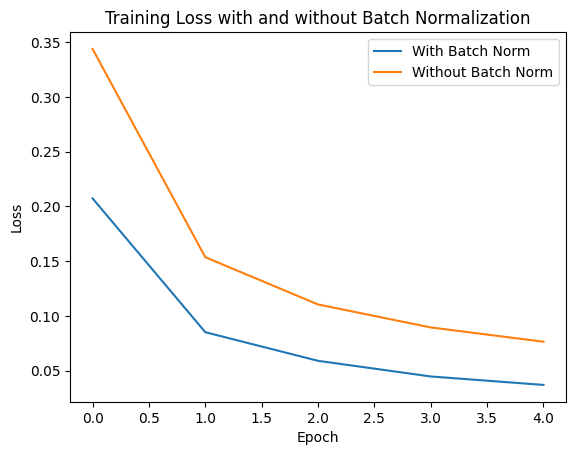

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# Define two models: one with batch normalization, one without

class SimpleNN(nn.Module):
    def __init__(self, use_bn=False):
        super(SimpleNN, self).__init__()
        self.use_bn = use_bn
        self.layer1 = nn.Linear(28*28, 256)
        self.bn1 = nn.BatchNorm1d(256) if use_bn else nn.Identity()
        self.layer2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128) if use_bn else nn.Identity()
        self.layer3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = torch.relu(self.bn1(self.layer1(x)))
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.layer3(x)
        return x

# Initialize models, loss, and optimizer
model_with_bn = SimpleNN(use_bn=True)
model_without_bn = SimpleNN(use_bn=False)
criterion = nn.CrossEntropyLoss()
optimizer_with_bn = optim.Adam(model_with_bn.parameters(), lr=0.001)
optimizer_without_bn = optim.Adam(model_without_bn.parameters(), lr=0.001)

# Training function
def train(model, optimizer, num_epochs=5):
    model.train()
    losses = []
    for epoch in range(num_epochs):
        epoch_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(train_loader)
        losses.append(avg_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return losses

# Train both models
print("Training model with batch normalization...")
losses_with_bn = train(model_with_bn, optimizer_with_bn)

print("\nTraining model without batch normalization...")
losses_without_bn = train(model_without_bn, optimizer_without_bn)

# Plotting the losses
plt.plot(losses_with_bn, label="With Batch Norm")
plt.plot(losses_without_bn, label="Without Batch Norm")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Training Loss with and without Batch Normalization")
plt.show()


TypeError: SimpleNN.__init__() got an unexpected keyword argument 'use_bn'